In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

PATH = "C:/Users/hp/Desktop/mon portfolio/Support intellegence and risk monitoring system/archive(1)/aa_dataset-tickets-multi-lang-5-2-50-version.csv"
df = pd.read_csv(PATH)

df_en = df[df["language"]=="en"].copy()
print("EN shape:", df_en.shape)
df_en.head(3)


EN shape: (16338, 16)


,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN


In [6]:
pd.DataFrame({
    "col": df_en.columns,
    "dtype": [str(df_en[c].dtype) for c in df_en.columns],
    "missing_%": (df_en.isna().mean()*100).round(2).values
}).sort_values("missing_%", ascending=False)


,col,dtype,missing_%
15,tag_8,object,98.28
14,tag_7,object,93.06
13,tag_6,object,79.37
12,tag_5,object,48.49
0,subject,object,15.96
11,tag_4,object,10.47
10,tag_3,object,0.42
9,tag_2,object,0.04
2,answer,object,0.02
6,language,object,0.00


In [7]:
# Subject missing
subject_missing = df_en["subject"].isna() | (df_en["subject"].astype(str).str.strip()=="")
print("Subject missing:", subject_missing.sum(), "/", len(df_en), f"({subject_missing.mean()*100:.2f}%)")

# Tags columns
tag_cols = [c for c in df_en.columns if re.fullmatch(r"tag_\d+", c)]
tag_missing = {c: float(df_en[c].isna().mean()*100) for c in tag_cols}
pd.DataFrame({"tag_col": list(tag_missing.keys()), "missing_%": list(tag_missing.values())}).sort_values("missing_%", ascending=False)


Subject missing: 2607 / 16338 (15.96%)


,tag_col,missing_%
7,tag_8,98.280083
6,tag_7,93.059126
5,tag_6,79.373240
4,tag_5,48.488187
3,tag_4,10.472518
2,tag_3,0.422328
1,tag_2,0.036724
0,tag_1,0.000000


In [23]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Style global
plt.rcParams.update({
    "figure.figsize": (10, 5),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "font.size": 11
})

def add_value_labels(ax, fmt="{:.0f}", pad=3):
    """Annoter les barres."""
    for p in ax.patches:
        v = p.get_width() if p.get_width() > 0 else p.get_height()
        if p.get_width() > 0:
            ax.annotate(fmt.format(v),
                        (p.get_width(), p.get_y() + p.get_height()/2),
                        xytext=(pad, 0), textcoords="offset points",
                        va="center")
        else:
            ax.annotate(fmt.format(v),
                        (p.get_x() + p.get_width()/2, p.get_height()),
                        xytext=(0, pad), textcoords="offset points",
                        ha="center")


In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

THEME = {
    "bg": "#ffffff",
    "panel": "#f8fafc",
    "text": "#0f172a",
    "muted": "#475569",
    "grid": "#cbd5e1",
    "border": "#e2e8f0",
    "blue": "#2563eb",
    "green": "#22c55e",
    "orange": "#f59e0b",
    "red": "#ef4444",
    "purple": "#a855f7",
    "teal": "#14b8a6"
}

plt.rcParams.update({
    "figure.facecolor": THEME["bg"],
    "axes.facecolor": THEME["panel"],
    "axes.edgecolor": THEME["border"],
    "axes.labelcolor": THEME["muted"],
    "xtick.color": THEME["muted"],
    "ytick.color": THEME["muted"],
    "text.color": THEME["text"],
    "axes.titleweight": "bold",
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "font.size": 11,
    "axes.grid": True,
    "grid.color": THEME["grid"],
    "grid.alpha": 0.25,
    "grid.linestyle": "-",
    "axes.spines.top": False,
    "axes.spines.right": False
})

def annotate_bars(ax, orient="v", fmt="{:,}", pad=3, color=None):
    """Annotate bars with values. orient: 'v' or 'h'."""
    color = color or THEME["text"]
    for p in ax.patches:
        if orient == "v":
            v = p.get_height()
            if v <= 0: 
                continue
            ax.annotate(fmt.format(int(v)),
                        (p.get_x() + p.get_width()/2, v),
                        xytext=(0, pad), textcoords="offset points",
                        ha="center", va="bottom", color=color, fontsize=10)
        else:
            v = p.get_width()
            if v <= 0: 
                continue
            ax.annotate(fmt.format(int(v)),
                        (v, p.get_y() + p.get_height()/2),
                        xytext=(pad, 0), textcoords="offset points",
                        ha="left", va="center", color=color, fontsize=10)

def nice_title(ax, title, subtitle=None):
    ax.set_title(title, loc="left", pad=12)
    if subtitle:
        ax.text(0, 1.02, subtitle, transform=ax.transAxes,
                ha="left", va="bottom", color=THEME["muted"], fontsize=11)

def clean_axes(ax):
    ax.grid(True, axis="y", alpha=0.25)
    ax.set_axisbelow(True)


In [8]:
vc = df_en["priority"].value_counts()
vc


priority
medium    6618
high      6346
low       3374
Name: count, dtype: int64

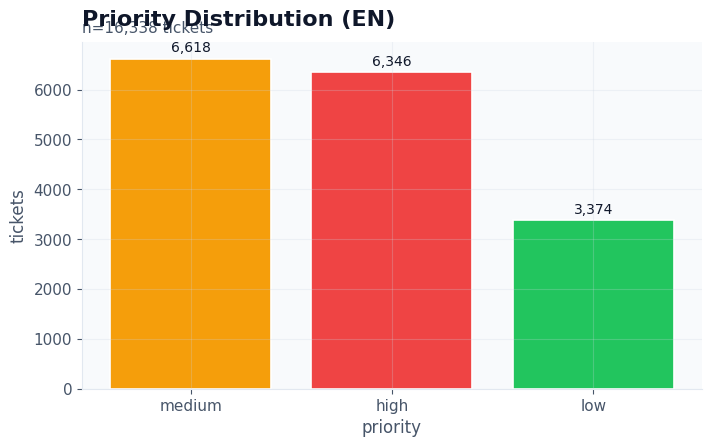

In [25]:
vc = df_en["priority"].value_counts()

colors = {"low": THEME["green"], "medium": THEME["orange"], "high": THEME["red"]}
bar_colors = [colors.get(k, THEME["blue"]) for k in vc.index]

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.bar(vc.index, vc.values, color=bar_colors, edgecolor="white", linewidth=1.2)
nice_title(ax, "Priority Distribution (EN)", subtitle=f"n={len(df_en):,} tickets")
ax.set_xlabel("priority")
ax.set_ylabel("tickets")
annotate_bars(ax, orient="v")
plt.show()


In [10]:
q = df_en["queue"].value_counts().head(15)
q


queue
Technical Support                  4737
Product Support                    3073
Customer Service                   2410
IT Support                         1942
Billing and Payments               1595
Returns and Exchanges               820
Service Outages and Maintenance     664
Sales and Pre-Sales                 513
Human Resources                     348
General Inquiry                     236
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_13832\2352268457.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("viridis")


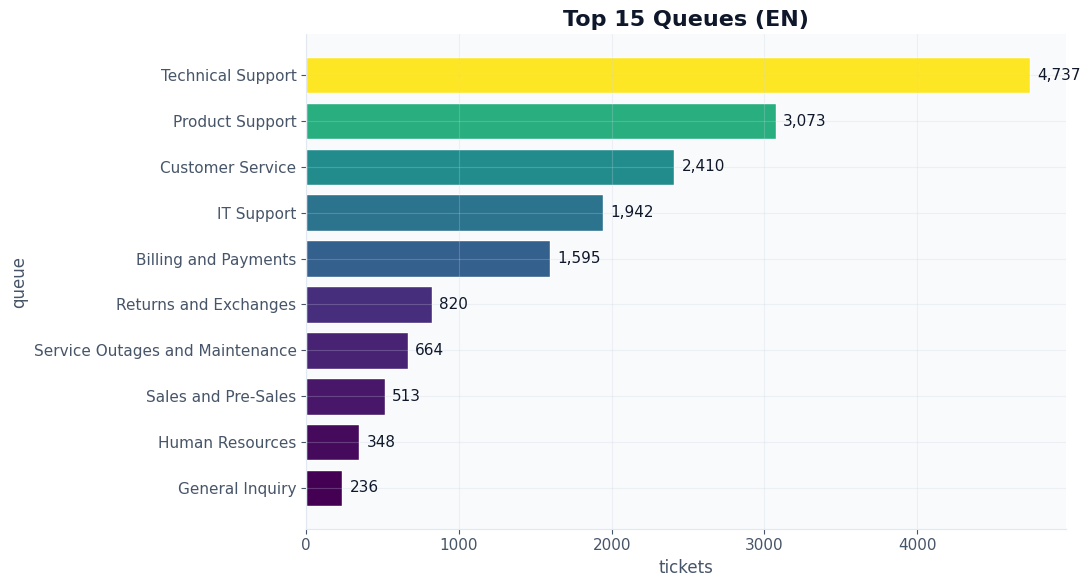

In [21]:
topN = 15
q = df_en["queue"].value_counts().head(topN).sort_values()  # tri pour barh

cmap = mpl.cm.get_cmap("viridis")
norm = mpl.colors.Normalize(vmin=q.min(), vmax=q.max())
colors = [cmap(norm(v)) for v in q.values]

fig, ax = plt.subplots(figsize=(11, 6))
ax.barh(q.index, q.values, color=colors, edgecolor="white", linewidth=1.0)
ax.set_title(f"Top {topN} Queues (EN)")
ax.set_xlabel("tickets")
ax.set_ylabel("queue")

# annotation
for y, v in enumerate(q.values):
    ax.text(v + q.max()*0.01, y, f"{v:,}", va="center")

plt.tight_layout()
plt.show()


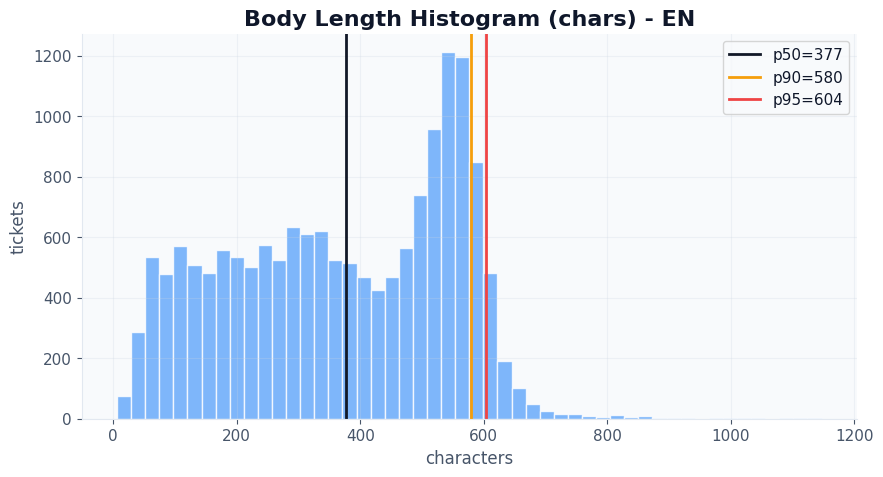

In [22]:
body_len = df_en["body"].fillna("").astype(str).str.len()

p50 = int(body_len.median())
p90 = int(body_len.quantile(0.90))
p95 = int(body_len.quantile(0.95))

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(body_len, bins=50, color="#60a5fa", alpha=0.8, edgecolor="white")
ax.set_title("Body Length Histogram (chars) - EN")
ax.set_xlabel("characters")
ax.set_ylabel("tickets")

ax.axvline(p50, color="#111827", linewidth=2, label=f"p50={p50}")
ax.axvline(p90, color="#f59e0b", linewidth=2, label=f"p90={p90}")
ax.axvline(p95, color="#ef4444", linewidth=2, label=f"p95={p95}")
ax.legend()

plt.show()


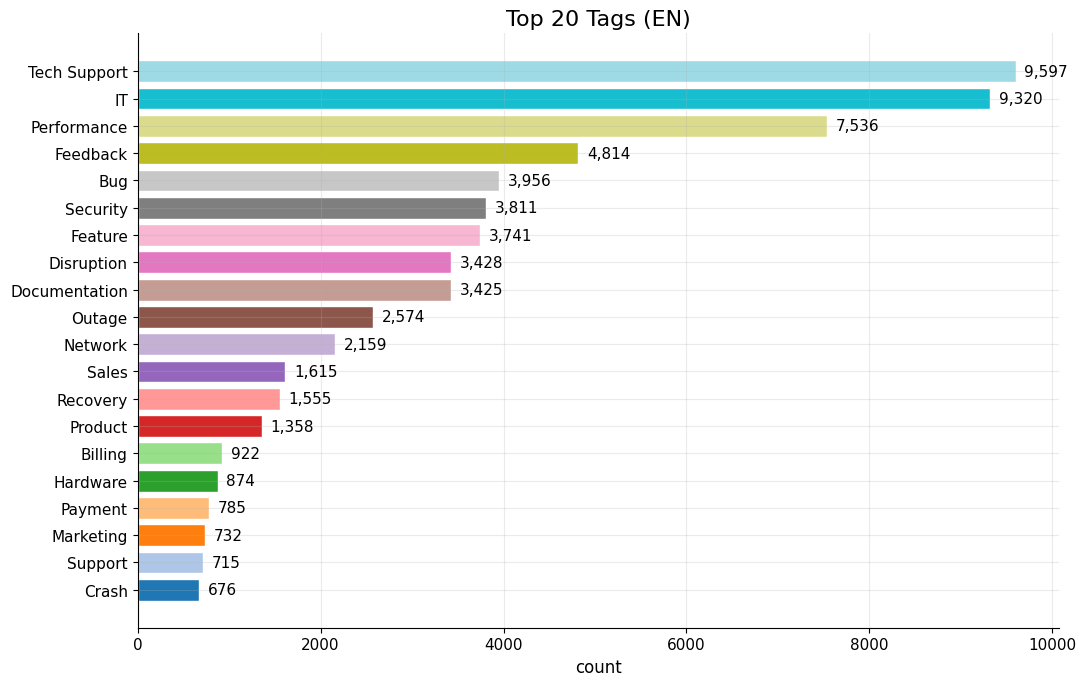

In [18]:
import re

tag_cols = [c for c in df_en.columns if re.fullmatch(r"tag_\d+", c)]
all_tags = df_en[tag_cols].stack().dropna().astype(str).str.strip()
all_tags = all_tags[~all_tags.str.lower().isin(["nan","none","null",""])]

topK = 20
top_tags = all_tags.value_counts().head(topK).sort_values()

palette = plt.cm.tab20(np.linspace(0, 1, len(top_tags)))

fig, ax = plt.subplots(figsize=(11, 7))
ax.barh(top_tags.index, top_tags.values, color=palette, edgecolor="white", linewidth=1.0)
ax.set_title(f"Top {topK} Tags (EN)")
ax.set_xlabel("count")

for y, v in enumerate(top_tags.values):
    ax.text(v + top_tags.max()*0.01, y, f"{int(v):,}", va="center")

plt.tight_layout()
plt.show()


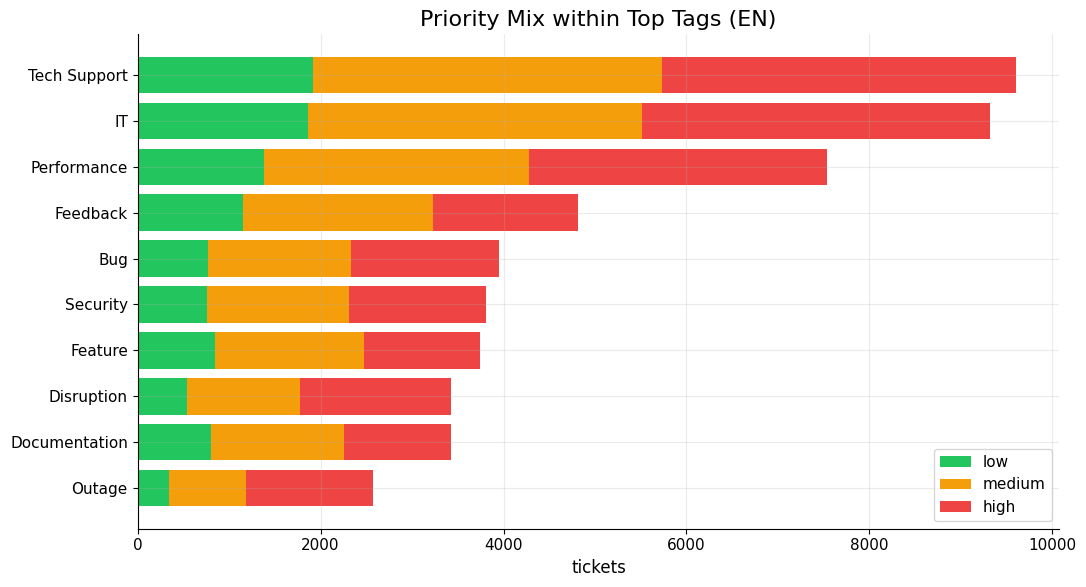

In [19]:
top10 = all_tags.value_counts().head(10).index.tolist()

rows = []
for tag in top10:
    mask = df_en[tag_cols].astype(str).eq(tag).any(axis=1)
    dist = df_en.loc[mask, "priority"].value_counts()
    rows.append({
        "tag": tag,
        "low": dist.get("low", 0),
        "medium": dist.get("medium", 0),
        "high": dist.get("high", 0)
    })

plot_df = (pd.DataFrame(rows)
           .assign(total=lambda d: d["low"]+d["medium"]+d["high"])
           .sort_values("total")
           .set_index("tag"))

fig, ax = plt.subplots(figsize=(11, 6))
ax.barh(plot_df.index, plot_df["low"], color="#22c55e", label="low")
ax.barh(plot_df.index, plot_df["medium"], left=plot_df["low"], color="#f59e0b", label="medium")
ax.barh(plot_df.index, plot_df["high"], left=plot_df["low"]+plot_df["medium"], color="#ef4444", label="high")

ax.set_title("Priority Mix within Top Tags (EN)")
ax.set_xlabel("tickets")
ax.legend()

plt.tight_layout()
plt.show()


In [27]:
dup_body = df_en["body"].duplicated().mean()*100
dup_sub_body = (df_en["subject"].fillna("").astype(str).str.strip() + "||" +
                df_en["body"].fillna("").astype(str).str.strip()).duplicated().mean()*100

print(f"Duplicate rate body: {dup_body:.2f}%")
print(f"Duplicate rate subject+body: {dup_sub_body:.2f}%")


Duplicate rate body: 0.00%
Duplicate rate subject+body: 0.00%


In [28]:
import re, numpy as np
tag_cols = [c for c in df_en.columns if re.fullmatch(r"tag_\d+", c)]
n_tags = df_en[tag_cols].notna().sum(axis=1)

print(n_tags.value_counts().sort_index())
print("No-tag tickets:", (n_tags==0).sum(), "/", len(df_en))


1       6
2      63
3    1642
4    6211
5    5046
6    2236
7     853
8     281
Name: count, dtype: int64
No-tag tickets: 0 / 16338
